<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Statistics - part 2-1 (EDA on my own Data)

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# get matplot to show charts inline
%matplotlib inline

In [183]:
#df.describe()
#df.shape

(45, 22)

In [100]:
#df = pd.read_csv('C:\\Users\\apple\\Downloads\\cleveland.data',encoding="ISO-8859-1",sep=",")
#dfHSMT9011 = pd.read_csv('C:\\Users\\apple\\Downloads\\discussion.csv',encoding="utf-8")
#dfHSMT9011
df = pd.read_csv('C:\\Users\\apple\\Downloads\\HSMT9015+G26+2020+SET+Survey+(online+delivery)_January+13,+2021_19.10+xhm.csv',encoding="utf-8")
dfSelct=df[['Q1', 'Q2', 'Q4', 'Q5', 'Q6',
       'Q7', 'Q8', 'Q9']]

# dfSelct

# exploring bar plot

In [394]:
import altair as alt

In [101]:
dfSelctN=pd.get_dummies(dfSelct.stack()).groupby(level=1).sum()
dfSelctN

,3.0,4.0,5.0
Q1,3,8,29
Q2,3,6,31
Q4,2,5,33
Q5,1,7,32
Q6,4,9,27
Q7,0,6,34
Q8,0,4,36
Q9,1,8,31


In [424]:
dfSelctN.columns.astype(str)

Index(['3.0', '4.0', '5.0'], dtype='object')

In [102]:
dfSelctN.columns=['3', '4', '5']
dfSelctN

,3,4,5
Q1,3,8,29
Q2,3,6,31
Q4,2,5,33
Q5,1,7,32
Q6,4,9,27
Q7,0,6,34
Q8,0,4,36
Q9,1,8,31


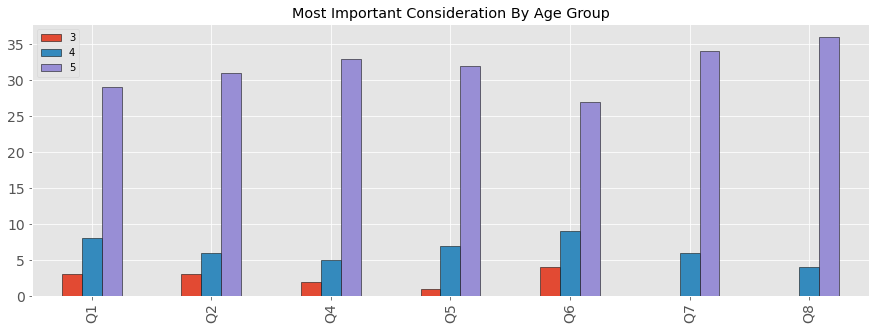

In [107]:
#dfSelctN[:-1].sort_index(ascending=False).plot(
dfSelctN[:-1].sort_index(ascending=True).plot(
    kind='bar',
    figsize=(15, 5),
    #cmap='rocket',
    edgecolor='black',
    fontsize=14,
    title='Most Important Consideration By Age Group'
    ).yaxis.label.set_visible(False)


# exporing divergent bar chart for survey result

   ##      1.example plot

likert_colors = ['white', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']
dummy = pd.DataFrame([[1,2,3,4, 5], [5,6,7,8, 5], [10, 4, 2, 10, 5]],
                     columns=["SD", "D", "N", "A", "SA"],
                    index=["Key 1", "Key B", "Key III"])
middles = dummy[["SD", "D"]].sum(axis=1)+dummy["N"]*.5
longest = middles.max()
complete_longest = dummy.sum(axis=1).max()
#dummy.insert(0, '', (middles - longest).abs())

dummy.plot.barh(stacked=True, color=likert_colors, edgecolor='none', legend=False)
z = plt.axvline(longest, linestyle='--', color='black', alpha=.5)
z.set_zorder(-1)

plt.xlim(0, complete_longest)
xvalues = range(0,complete_longest,10)
xlabels = [str(x-longest) for x in xvalues]
plt.xticks(xvalues, xlabels)
plt.show()

## 2.example plot with my own data¶

TypeError: 'float' object cannot be interpreted as an integer

<Figure size 432x288 with 0 Axes>

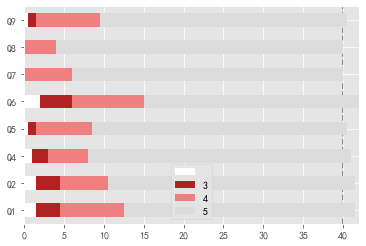

In [436]:
plt.clf()
longest = middles.max()
complete_longest = dfSelctN.sum(axis=1).max()

#dfSelctN.insert(0, '', (middles - longest).abs())

dfSelctN.plot.barh(stacked=True, color=likert_colors, edgecolor='none', legend=True)
z = plt.axvline(longest, linestyle='--', color='black', alpha=.5)
z.set_zorder(-1)

plt.xlim(0, complete_longest)
xvalues = range(0,complete_longest,10)
xlabels = [str(x-longest) for x in xvalues]
plt.xticks(xvalues, xlabels)
plt.show()

# Data Profiling

In [199]:
#df = pd.read_csv('C:\\Users\\apple\\Downloads\\cleveland.data',encoding="ISO-8859-1",sep=",")
df = pd.read_csv('C:\\Users\\apple\\Downloads\\HSMT9015+G26+2020+SET+Survey+(online+delivery)_January+13,+2021_19.10+xhm.csv',encoding="utf-8")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   startDate          45 non-null     object 
 1   endDate            45 non-null     object 
 2   status             45 non-null     int64  
 3   ipAddress          45 non-null     object 
 4   progress           45 non-null     int64  
 5   duration           45 non-null     int64  
 6   finished           45 non-null     int64  
 7   recordedDate       45 non-null     object 
 8   _recordId          45 non-null     object 
 9   locationLatitude   40 non-null     float64
 10  locationLongitude  40 non-null     float64
 11  userLanguage       45 non-null     object 
 12  Q1                 40 non-null     float64
 13  Q2                 40 non-null     float64
 14  Q3                 39 non-null     float64
 15  Q4                 40 non-null     float64
 16  Q5                 40 non-nu

In [121]:
import pandas_profiling

In [122]:
pandas_profiling.ProfileReport(df)

# EDA some statistics (mean, medium, corraltion)

In [200]:
df.columns

Index(['startDate', 'endDate', 'status', 'ipAddress', 'progress', 'duration',
       'finished', 'recordedDate', '_recordId', 'locationLatitude',
       'locationLongitude', 'userLanguage', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6',
       'Q7', 'Q8', 'Q9', 'Q10', 'Q11'],
      dtype='object')

## Exploring missing values

In [201]:
total_rows =  df.shape[0]
columns = df.columns
na_values = {}

for column in columns:
    na_values[column] = f"{(1 - df[column].count() / total_rows)*100:.2f}%"
    
na_values

{'startDate': '0.00%',
 'endDate': '0.00%',
 'status': '0.00%',
 'ipAddress': '0.00%',
 'progress': '0.00%',
 'duration': '0.00%',
 'finished': '0.00%',
 'recordedDate': '0.00%',
 '_recordId': '0.00%',
 'locationLatitude': '11.11%',
 'locationLongitude': '11.11%',
 'userLanguage': '0.00%',
 'Q1': '11.11%',
 'Q2': '11.11%',
 'Q3': '13.33%',
 'Q4': '11.11%',
 'Q5': '11.11%',
 'Q6': '11.11%',
 'Q7': '11.11%',
 'Q8': '11.11%',
 'Q9': '11.11%',
 'Q10': '84.44%',
 'Q11': '93.33%'}

In [179]:
#print('mean of Q1:\n\n',np.mean(df['Q1']))
print('mean of Q1:=',np.mean(df['Q1'].dropna()))
print('\n')

print('median of Q1=',np.median(df['Q1'].dropna()))
                                          
print('\n')


print('mode of Q1=',stats.mode(df['Q1'].dropna()))
print('\n')
print('percentile of Q1=',np.percentile(df['Q1'].dropna(),[25,50,75]))
print('\n')
print('statistical summary of Q1=',stats.describe(df['Q1'].dropna()))

mean of Q1:= 4.65


median of Q1= 5.0


mode of Q1= ModeResult(mode=array([5.]), count=array([29]))


percentile of Q1= [4. 5. 5.]


statistical summary of Q1= DescribeResult(nobs=40, minmax=(3.0, 5.0), mean=4.65, variance=0.38717948717948714, skewness=-1.5553599284858075, kurtosis=1.2277531687206746)


In [310]:
# ANSWER
corr_matrix = df[[ 'Q1', 'Q2', 'Q4', 'Q5', 'Q6',
       'Q7', 'Q8', 'Q9', 'Q10']].corr()

corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(4)

,Q1,Q2,Q4,Q5,Q6,Q7,Q8,Q9
Q1,1.0000,0.5968,0.4544,0.6743,0.4914,0.4444,0.4883,0.7097
Q2,0.5968,1.0000,0.5011,0.4662,0.5563,0.4901,0.5278,0.5985
Q4,0.4544,0.5011,1.0000,0.6020,0.4421,0.6215,0.6523,0.5631
Q5,0.6743,0.4662,0.6020,1.0000,0.6472,0.6873,0.7213,0.7310
Q6,0.4914,0.5563,0.4421,0.6472,1.0000,0.5724,0.4125,0.5964
Q7,0.4444,0.4901,0.6215,0.6873,0.5724,1.0000,0.7935,0.6465
Q8,0.4883,0.5278,0.6523,0.7213,0.4125,0.7935,1.0000,0.5130
Q9,0.7097,0.5985,0.5631,0.7310,0.5964,0.6465,0.5130,1.0000


<AxesSubplot:>

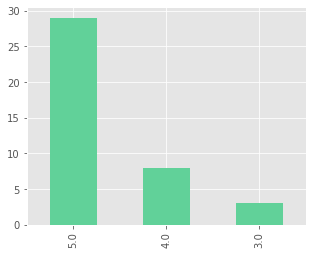

In [155]:
df['Q1'].value_counts().plot(kind="bar",figsize=(5,4), color="#61d199")

In [167]:
Q1_value = df['Q1'].values.tolist()
Q1_value_count = df['Q1'].value_counts()
Q1_value_count
#list(Q1_value_count)

5.0    29
4.0     8
3.0     3
Name: Q1, dtype: int64

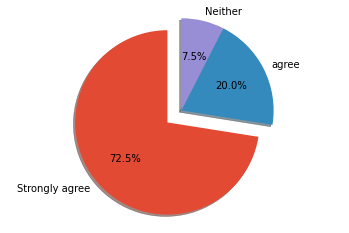

In [169]:
#df['Q1'].value_counts().plot(kind="pie",figsize=(15,7))

# plot frequency of some observations using pie chart
labels = 'Strongly agree', 'agree', 'Neither'
frequency= list(df['Q1'].value_counts())
fig1, ax1 = plt.subplots()
explode = (0.2, 0,  0)  # only "explode" the 1rd slice (i.e. 'Strongly agree')
ax1.pie(frequency, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [150]:
df['Q3'].value_counts()### This is a "Yes" or "No"  question. "1" mean "Yes".


1.0    39
Name: Q3, dtype: int64

In [151]:
df['Q3'].value_counts(normalize=True) ### Here it didn't take missing values into account.

1.0    1.0
Name: Q3, dtype: float64

## Students Geolocations

In [135]:
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import folium
from folium.plugins import MarkerCluster
#pip install folium

In [138]:
def generateBaseMap(default_location=[39.1423034667968,117.172607421875], default_zoom_start=12):
    
    base_map = folium.Map(
        location = default_location
        , control_scale = True
        , zoom_start = default_zoom_start
    )
    
    return base_map

In [149]:
#base_map = generateBaseMap(default_location=[39.1423034667968,117.172607421875])
#display(base_map)

In [140]:
df.columns

Index(['startDate', 'endDate', 'status', 'ipAddress', 'progress', 'duration',
       'finished', 'recordedDate', '_recordId', 'locationLatitude',
       'locationLongitude', 'userLanguage', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6',
       'Q7', 'Q8', 'Q9', 'Q10'],
      dtype='object')

In [221]:
base_map = generateBaseMap(default_location=[39.1423034667968,117.172607421875])
# for speed purposes
MAX_RECORDS =39
# create empty map zoomed in on San Francisco
#map = folium.Map(location=SF_COORDINATES, zoom_start=12)
 
# add a marker for every record in the filtered data, use a clustered view
for each in df[0:MAX_RECORDS].iterrows():
        location = [each[1]['locationLatitude'],each[1]['locationLongitude']]
        #icons = [folium.Icon(icon="car", prefix="fa")]
        folium.Circle(location,fill=True,radius=100000).add_to(base_map)
        
base_map    
            

# Word cloud Anaysis for students' feedback

In [252]:

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from os import path, getcwd
from PIL import Image
import jieba
import jieba.analyse
import sqlite3

In [229]:
d = getcwd()
d

'C:\\Users\\apple\\Downloads'

In [320]:
data=df[['Q10']].dropna()
data


,message
0,communication culture - you are correct that t...
1,1.决策层领导互相不沟通或者沟通不够，会导致一项决策难以落地甚至无法开展，及时开展也会让中层...
2,1、医院没有系统的预警机制：目前医院所处的社会环境越来越复杂，患者的维权意识越来越强。医院管...
3,"Based on my work environment, I personally b..."
4,"Patient safety, communication plays an importa..."
...,...
117,Internal communication problems in the hospita...
118,1. The manager's own cognitive problems:\n\nMa...
119,\t*\nMisunderstand of privilege between differ...
120,succinct and accurate identification of issues!


In [322]:
textZH=";".join([str(c) for c in data['Q10'].tolist()] )
textZH

'communication culture - you are correct that this is the key!;1.决策层领导互相不沟通或者沟通不够，会导致一项决策难以落地甚至无法开展，及时开展也会让中层执行者左右为难，无法高效的完成任务。\n\n1.Decision-making leaders do not communicate with each other or do not communicate enough, which will make a decision difficult to implement or even impossible to carry out, and timely implementation will also make middle-level executives difficult to complete their tasks efficiently。\n\n2.医院行政科室不经常与临床科室沟通，会导致制定政策时不考虑临床实际的可操作性，从而造成制度难以落地，临床科室抵触进一步影响到患者。\n\nInfrequent communication between hospital administrative departments and clinical departments can lead to the development of policies that do not take into account the actual clinical operability, thus making it difficult to implement the system and further affecting patients with resistance from clinical departments.\n\n3.医生与护士不重视与患者及其家属沟通，会导致投诉、医疗纠纷甚至社会事件。\n\n3.Doctors and nurses do not pay attention to communication with patients and their families, which can lead to complaints, medical disputes and ev

In [323]:
cut=jieba.cut(textZH)
textZHFC =' '.join(cut)
textNoFC=str (list(df['Q10'].dropna()))
textNoFC

'[\'communication culture - you are correct that this is the key!\', \'1.决策层领导互相不沟通或者沟通不够，会导致一项决策难以落地甚至无法开展，及时开展也会让中层执行者左右为难，无法高效的完成任务。\\n\\n1.Decision-making leaders do not communicate with each other or do not communicate enough, which will make a decision difficult to implement or even impossible to carry out, and timely implementation will also make middle-level executives difficult to complete their tasks efficiently。\\n\\n2.医院行政科室不经常与临床科室沟通，会导致制定政策时不考虑临床实际的可操作性，从而造成制度难以落地，临床科室抵触进一步影响到患者。\\n\\nInfrequent communication between hospital administrative departments and clinical departments can lead to the development of policies that do not take into account the actual clinical operability, thus making it difficult to implement the system and further affecting patients with resistance from clinical departments.\\n\\n3.医生与护士不重视与患者及其家属沟通，会导致投诉、医疗纠纷甚至社会事件。\\n\\n3.Doctors and nurses do not pay attention to communication with patients and their families, which can lead to complaints, medic

In [256]:
tags =jieba.analyse.extract_tags(textZHFC,topK=100,withWeight =True)
print(tags)

[('老师', 0.5794019756909091), ('能举', 0.5433985228590908), ('线下', 0.4505315275186364), ('讲课', 0.4368281004922727), ('财务管理', 0.4278200582836364), ('举例', 0.4109484203459091), ('事例', 0.4053214104668182), ('密切关系', 0.37588481227954545), ('课程', 0.36676341703136367), ('实用', 0.34620652231363636), ('环节', 0.323413182135), ('感受', 0.3133628375063636), ('期待', 0.30496583281545453), ('医院', 0.26649142805772724), ('喜欢', 0.2592085637736364), ('建议', 0.2378010050568182), ('非常', 0.22287650028818182), ('特别', 0.21580702503954544), ('管理', 0.21246668635545454), ('之间', 0.20279680904818181), ('我们', 0.15415081668136363)]


In [264]:
word_result =pd.DataFrame(tags,columns=['词语','重要性'])
word_result.sort_values(by='重要性', ascending = False,inplace=True)
word_result

,词语,重要性
0,老师,0.579402
1,能举,0.543399
2,线下,0.450532
3,讲课,0.436828
4,财务管理,0.427820
5,举例,0.410948
6,事例,0.405321
7,密切关系,0.375885
8,课程,0.366763
9,实用,0.346207


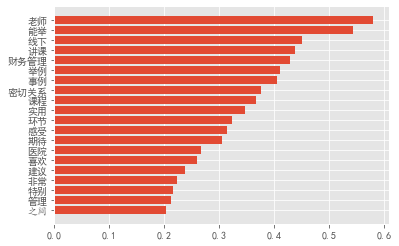

In [300]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='C:\Windows\Fonts\simkai.ttf')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.barh( y=np.arange(0,20),width=word_result[:20]['重要性'][::-1] )
plt.yticks(np.arange(0,20),labels=word_result[:20]["词语"][::-1],fontproperties=font)
from matplotlib.font_manager import _rebuild
_rebuild()
plt.show()

In [294]:
#numpy image file of mask image 
mask_logo = np.array(Image.open(path.join(d, "Bigger_Pockets_Logo4.png")))


In [ ]:
#create the word cloud object 
wc= WordCloud(background_color="white", max_words=2000, max_font_size=200, random_state=1, mask=mask_logo, stopwords=STOPWORDS,font_path="C:\Windows\Fonts\simkai.ttf")

wc.generate(textZHFC)

image_colors = ImageColorGenerator(mask_logo)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=[15,15])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
#plt.show()
plt.savefig('word.jpg',dpi=500 )

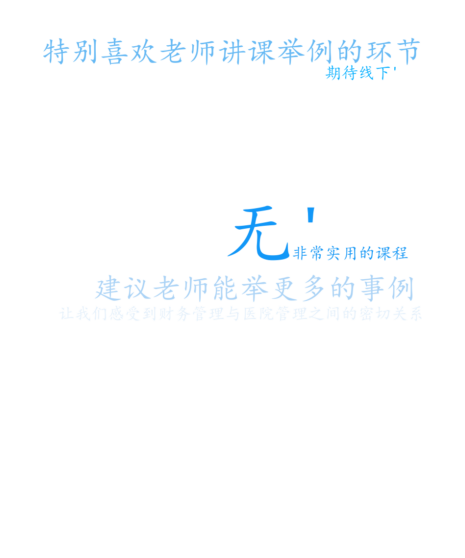

In [316]:
#create the word cloud object 
wc= WordCloud(background_color="white", max_words=2000, max_font_size=150, random_state=1, mask=mask_logo, stopwords=STOPWORDS,font_path="C:\Windows\Fonts\simkai.ttf")

wc.generate(textNoFC)

image_colors = ImageColorGenerator(mask_logo)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=[15,10])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
#plt.show()
plt.savefig('word.jpg',dpi=500 )

In [216]:
text=str (list(df['Q11'].dropna()))
text

"['Some comments.', 'Good', 'The global financial crisis has contributed to the economic depression in America. In 2009, with a GDP growth rate of 2.4 per cent, the U.S. suffered from constantly rising unemployment and declining household income, thus depriving more and more people of the ability to afford the exorbitant Medicare costs. Consequently, an increasing number of individuals have had no health care insurance, which is not conducive to a stable social development. In 2000, the proportion of employer-based medical insurance was 67.1 per cent, whereas the number diminished to 55.8 percent by 2009. Against the backdrop of a financial crisis, enterprises are all confronted with low economic efficiency and heavy fiscal pressure. As a result, many businesses have become bankrupt due to operating losses. Experts contend that the predominant reason behind the enormous bankruptcies in America lies in over-proportional Medicare spending instead of the financial crisis in that the forme

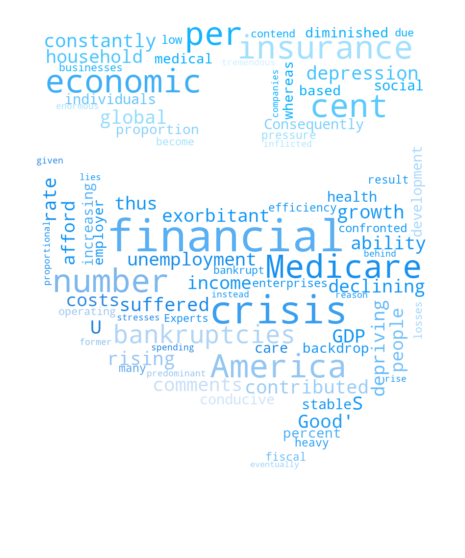

In [217]:
#create the word cloud object 
wc= WordCloud(background_color="white", max_words=2000, max_font_size=90, random_state=1, mask=mask_logo, stopwords=STOPWORDS)

wc.generate(text)

image_colors = ImageColorGenerator(mask_logo)

plt.figure(figsize=[10,10])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()

# Statistics - part 2-2 Lab contents

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# get matplot to show charts inline
%matplotlib inline

# 1. plot a histogram of a set of observations

experiment with various number of bins

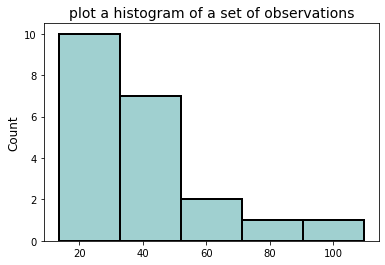

In [12]:
# plot a histogram of a set of observations
# experiment with various number of bins
x = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]
num_bins = 5
n,bins,patches=plt.hist(x,num_bins,facecolor='#A0D0D0',alpha=1,edgecolor='black',
           linewidth=2,align="right")
#plt.xticks(x,rotation=45,fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('plot a histogram of a set of observations',fontsize=14)
plt.show()

# 2. Calculate statistical information of a set of observations using numpy and stats
```
# Expected Output:
mean of observations = 28.884615384615383
median of observations = 27.0
mode of observations = ModeResult(mode=array([10]), count=array([4]))
percentile of observations = [10.   27.   35.75]
statistical summary of observations = DescribeResult(nobs=26, minmax=(4, 100), mean=28.884615384615383, variance=523.3061538461537, skewness=1.4001632366778733, kurtosis=2.0634808152807826)
```

In [19]:
# calculate statistical information of a set of observations using numpy and stats
observations = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100,10,32,49,10,10]
print('mean of observations=',np.mean(observations))
print('\n')
print('median of observations=',np.median(observations))
print('\n')
print('mode of observations=',stats.mode(observations))
print('\n')
print('percentile of observations=',np.percentile(observations,[25,50,75]))
print('\n')
print('statistical summary of observations=',stats.describe(observations))

mean of observations= 28.884615384615383


median of observations= 27.0


mode of observations= ModeResult(mode=array([10]), count=array([4]))


percentile of observations= [10.   27.   35.75]


statistical summary of observations= DescribeResult(nobs=26, minmax=(4, 100), mean=28.884615384615383, variance=523.3061538461537, skewness=1.4001632366778733, kurtosis=2.0634808152807826)


# 3. Plot box chart of obstravations

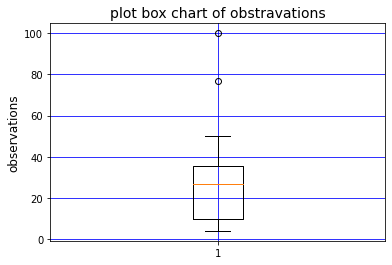

In [18]:
# plot box chart of obstravations
observations = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100,10,32,49,10,10]
plt.boxplot(observations)
plt.grid(b=False,which='major',color='b',linestyle='-')
plt.ylabel('observations',fontsize=12)
plt.title('plot box chart of obstravations',fontsize=14)
plt.show()

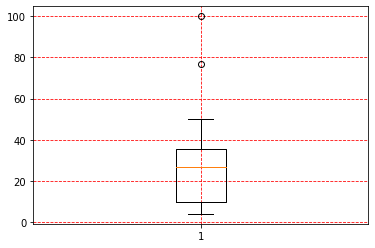

In [33]:
# plot box chart of obstravations
observations = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100,10,32,49,10,10]
plt.boxplot(observations)
plt.yscale('linear')
plt.grid(b=False,which='major',color='red',linestyle='--')
plt.show()

# 4. Create a Binomial Distribution

Lookup stats.binom.pmf

What does it do?

In [0]:
help(stats.binom.pmf)

Help on method pmf in module scipy.stats._distn_infrastructure:

pmf(k, *args, **kwds) method of scipy.stats._discrete_distns.binom_gen instance
    Probability mass function at k of the given RV.
    
    Parameters
    ----------
    k : array_like
        Quantiles.
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        Location parameter (default=0).
    
    Returns
    -------
    pmf : array_like
        Probability mass function evaluated at k



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


Binomial Distribution data:
 [0.00097656 0.00976563 0.04394531 0.1171875  0.20507813 0.24609375
 0.20507813 0.1171875  0.04394531 0.00976563 0.00097656 0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


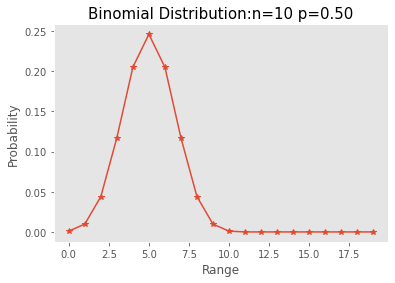

In [46]:
# creating a Binomial Distribution
n = 10
p = 0.5
k = np.arange(0,20)

print(k)

binomial = stats.binom.pmf(k, n, p)
print('\n')
print('Binomial Distribution data:\n',binomial)

plt.plot(k,binomial,'*-')
plt.title("Binomial Distribution:n=%i p=%.2f" %(n,p),fontsize=15)
plt.xlabel('Range')
plt.ylabel('Probability')
plt.grid()
plt.show()

# 5. Create a scatter plot

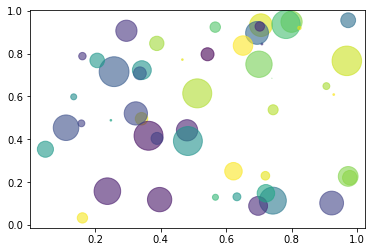

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
plt.scatter(x,y, s=area, c=colors,alpha=0.6)
plt.show()

# 6. Calculate and Visualize Correlations

NOTE: Lookup np.corrcoef. What does it do?

visualise correltions of x and y= [[1.         0.81543901]
 [0.81543901 1.        ]]


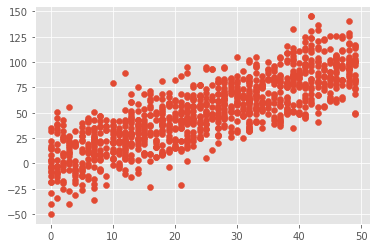

In [32]:
# Calculate and visualise correltions
import matplotlib
np.random.seed(1)

# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 1000)
# Positive Correlation with some noise
y = 2*x + np.random.normal(0, 20, 1000)
print('visualise correltions of x and y=',np.corrcoef(x,y))
matplotlib.style.use('ggplot')
plt.scatter(x,y)
plt.show()

26
[ 0.11163049 29.5832885 ]


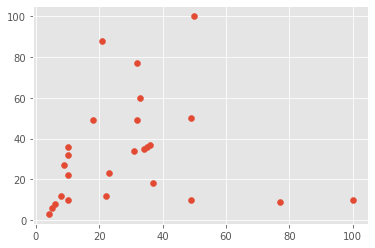

In [38]:
# Calculate the coefficient of best fit line or curve
x = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100,10,32,49,10,10]
y = [88,12,23,3,6,8,9,12,27,36,34,77,60,35,36,37,18,49,50,100,10,32,49,10,10,22]
matplotlib.style.use('ggplot')

plt.scatter(x,y)

print(np.polyfit(x,y,1))
plt.show()

# 7. [BONUS] Plot X, Y and Best Fit Line

**Write a function to calculate best fit.**

![alt text](https://i.imgur.com/B43vOV0.jpg)[1]

[1]: https://www.mathsisfun.com/data/least-squares-regression.html "Least Squares Regression"

best fit line:
y=(:.2f)+((:.2f))x


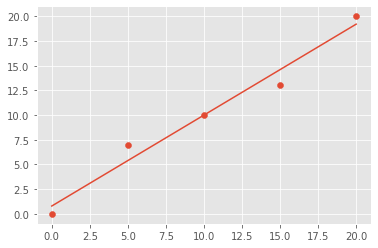

In [44]:
# sample points 
X = [0, 5, 10, 15, 20]
Y = [0, 7, 10, 13, 20]

# solve for a and b
def best_fit(X, Y):
    xbar=sum(X)/len(X)
    ybar=sum(Y)/len(Y)
    n=len(X)# orlen(Y)
    number = sum([xi*yi for xi,yi in zip(X,Y)])-n * xbar * ybar
    demum = sum([xi** 2 for xi in X])-n * xbar**2
    
    b=number/demum
    a=ybar -b * xbar
    
    print('best fit line:\ny=(:.2f)+((:.2f))x'.format(a,b))

    return a, b

# solution
a, b = best_fit(X, Y)
#best fit line:
#y = 0.80 + 0.92x
#y = 0.80 + 0.92x

# plot points and fit line
import matplotlib.pyplot as plt
plt.scatter(X,Y)
yfit=[a+b*xi for xi in X]
plt.plot(X,yfit)


# 8. plot a histogram of a set of observations - centered

Experiment with various number of bins

        y = x - np.mean(x)

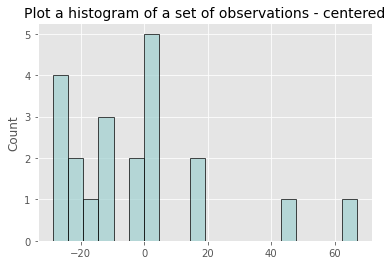

In [50]:
# plot a histogram of a set of observations - centered
# experiment with various number of bins
x = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]
y = y = x - np.mean(x)
num_bins = 20
n,bins,patches=plt.hist(y,num_bins,alpha=0.7,align='left',facecolor='#A0D0D0',
           edgecolor='black',linewidth=1)
plt.ylabel('Count',fontsize=12)
plt.title('Plot a histogram of a set of observations - centered',fontsize=14)
 
plt.show()


# 9. plot a histogram of a set of observations - scaled

        y = x / np.std(x)

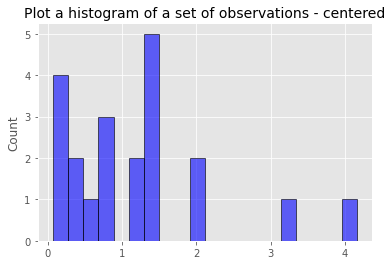

In [53]:
# plot a histogram of a set of observations - scaled
# experiment with various number of bins
x = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]
y = x / np.std(x)
num_bins = 20
n,bins,patches=plt.hist(y,num_bins,align='left',facecolor='blue',alpha=0.6,
           edgecolor='black',linewidth=1)
plt.ylabel('Count',fontsize=12)
plt.title('Plot a histogram of a set of observations - centered',fontsize=14)
 
plt.show()

# 10. [BONUS] Create a probplot against normal distribution

Check following methods:

1. stats.loggamma.rvs
2. stats.probplot
3. stats.norm
4. stats.boxcox

In [60]:
from scipy import stats
import matplotlib.pyplot as plt
nsample = 100
np.random.seed(7654321)

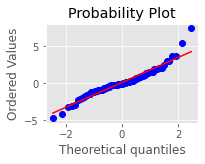

In [61]:
 #A t distribution with small degrees of freedom:
ax1 = plt.subplot(221)
x = stats.t.rvs(3, size=nsample)
res = stats.probplot(x, plot=plt)

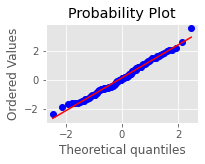

In [63]:
#A t distribution with larger degrees of freedom:
ax2 = plt.subplot(222)
x = stats.t.rvs(25, size=nsample)
res = stats.probplot(x, plot=plt)

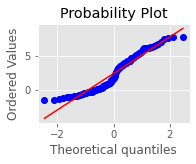

In [64]:
#A mixture of two normal distributions with broadcasting:
ax3 = plt.subplot(223)
x = stats.norm.rvs(loc=[0,5], scale=[1,1.5],size=(nsample//2,2)).ravel()
res = stats.probplot(x, plot=plt)

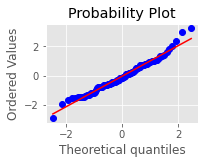

In [65]:
 #A standard normal distribution:
ax4 = plt.subplot(224)
x = stats.norm.rvs(loc=0, scale=1, size=nsample)
res = stats.probplot(x, plot=plt)

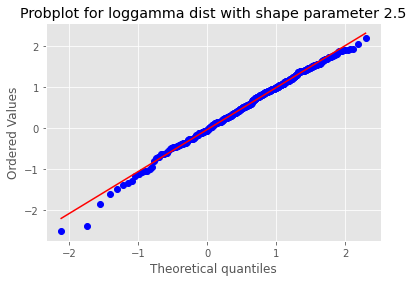

In [66]:

   
    #Produce a new figure with a loggamma distribution, using the ``dist`` and``sparams`` keywords:
fig = plt.figure()
ax = fig.add_subplot(111)
x = stats.loggamma.rvs(c=2.5, size=500)
res = stats.probplot(x, dist=stats.loggamma, sparams=(2.5,), plot=ax)
ax.set_title("Probplot for loggamma dist with shape parameter 2.5")
    #Show the results with Matplotlib:
plt.show()


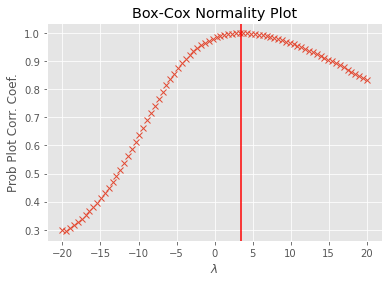

In [74]:
from scipy import stats
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
x = stats.loggamma.rvs(5, size=500) + 5
prob = stats.boxcox_normplot(x, -20, 20, plot=ax)
_, maxlog = stats.boxcox(x)
ax.axvline(maxlog, color='r')
plt.show()
#res = stats.probplot(x, plot=plt)
#res = stats.probplot(x, dist=stats.loggamma, sparams=(2.5,), plot=ax)

# 11. [BONUS] Calculate Mean Confidence Interval

Check following methods:

1. scipy.stats.sem
2. scipy.stats.t.ppf


      """
    Given a list or vector of data, this returns the mean, lower, and upper
    confidence intervals to the level of confidence specified (default = 95%
    confidence interval).
    """
   

In [95]:
import numpy as np
import scipy.stats


In [96]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t._ppf((1+ 0.95)/2., n-1)
    return m, m-h, m+h

In [97]:
data = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]
print(mean_confidence_interval(data))

(30.476190476190474, 19.539561081583383, 41.41281987079756)




---



---



> > > > > > > > > © 2019 Institute of Data


---



---



